In [ ]:
# 시계열 데이터 - 

시계열 데이터 

1.시간정보가 들어있는 데이터
*   "세상에는 시계열 데이터가 참 많다
*   단어가 나타내는 순서가 중요하다
*   샘플의 길이가 다름    
2.시계열 데이터를 인식하는 고전적인 모델
*   ARIMA, SARIMA
*   Prophet 등...
3.시계열 데이터를 인식하는 딥러닝 모델
*   순환 신경망(RNN)
*   LSTM(Long short term memory) : 선별기억능력을 갖춰 장기 문맥처리에 유리


매일 기온,  습도, 미세먼지 농도를 기록한다.  a1 = (23.2,42,0.25) a2=(, , ,)
* x = (a1,a2,a3 ,,,, at)
* 대표적인 응용은 미래 예측(prediction 또는 forecasting)
1.   내일 주가예측
2.   내일 날씨 예측
3.   기계의 고장 예측
4.   풍속과 풍향 예측(풍력 발전기의 효율 향상)
5.   농산물 가격/수요량 예측
6.   언어번역에 응용
7.   생성모델에 응용(사진을 보고 설명 문장 생성)


비트코인 예측하기

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
f = open('bitcoin.csv','r')
df = pd.read_csv(f,header=0)


Closing Price (USD) 종가만 가져온다

In [100]:
seq = df[['Closing Price (USD)']].to_numpy()

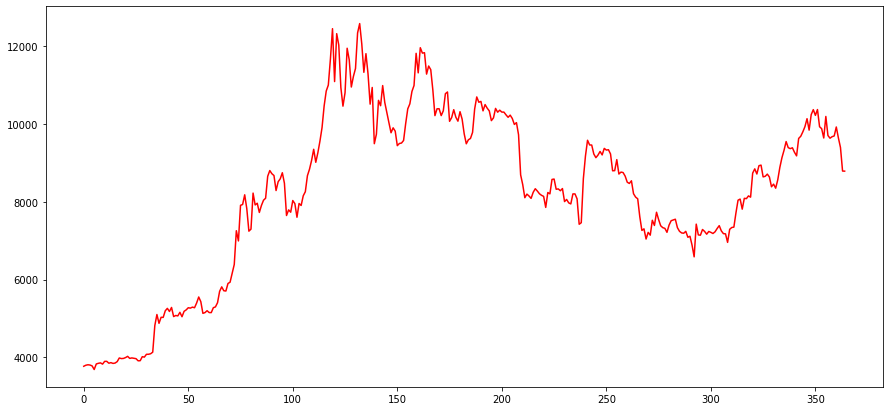

In [119]:
plt.figure(figsize=(15,7))
plt.plot(seq, color = 'red')
plt.show()

In [103]:
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

In [104]:
w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y = seq2dataset(seq,w,h)

In [105]:
# 훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

In [106]:
x_train[0].shape

(7, 1)

In [ ]:
# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

LSTM 모델 평가

In [110]:
ev = model.evaluate(x_test,y_test,verbose = 0)
print(f"손실함수 : {ev[0]}, MAE : {ev[1]}")

손실함수 : 187.8253173828125, MAE : 187.8253173828125


LSTM모델로 예측 수행

In [111]:
pred =  model.predict(x_test)
print(f"평균절댓값 백분율 오차(MAPE) : {sum(abs(y_test-pred)/y_test)/len(x_test)}")

평균절댓값 백분율 오차(MAPE) : [0.02276638]


학습곡선

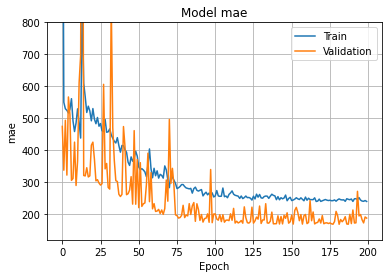

In [112]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'] )
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

예측결과 시각화

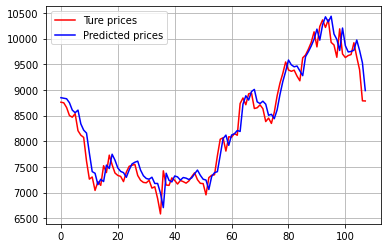

In [114]:
x_range = range(len(y_test))
plt.plot(x_range,y_test[x_range],color='red' )
plt.plot(x_range,pred[x_range],color='blue' )
plt.legend(['Ture prices','Predicted prices'], loc = 'best')
plt.grid()
plt.show()

일부 구간을 확대하여 시각화

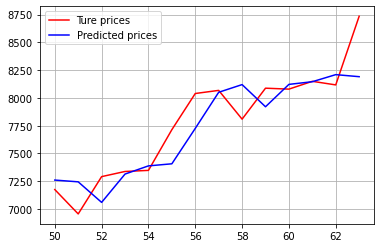

In [115]:
x_range = range(50,64)
plt.plot(x_range,y_test[x_range],color='red' )
plt.plot(x_range,pred[x_range],color='blue' )
plt.legend(['Ture prices','Predicted prices'], loc = 'best')
plt.grid()
plt.show()

다중채널 비트코인 가격 예측

In [124]:
seq = df[df.columns[2:]].to_numpy()

In [127]:
seq.shape

(365, 4)

In [129]:
X,Y = seq2dataset(seq,w,h)
print(X.shape, Y.shape)
print(X[0],Y[0])

(358, 7, 4) (358, 4)
[[3772.93633533 3796.63728431 3824.16587937 3666.52401643]
 [3799.67854295 3773.44146075 3879.23118467 3753.80002246]
 [3811.61197937 3799.36702601 3840.04482307 3788.91849833]
 [3804.41917011 3806.69151279 3819.19435612 3759.40921647]
 [3782.66410112 3807.84575592 3818.69548135 3766.24204823]
 [3689.86289319 3783.35506344 3804.35361623 3663.47774336]
 [3832.08088473 3701.04987103 3866.71870424 3688.69715385]] [3848.95636968 3832.59242908 3881.96576977 3802.51605364]


In [130]:
split = int(len(X)*0.7)
x_train = X[0:split]; y_train = Y[0:split]
x_test = X[split:]; y_test = Y[split:]

In [131]:
# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(4))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

Epoch 1/200
250/250 - 3s - loss: 1849.9761 - mae: 1849.9761 - val_loss: 403.4202 - val_mae: 403.4202 - 3s/epoch - 13ms/step
Epoch 2/200
250/250 - 1s - loss: 504.0073 - mae: 504.0073 - val_loss: 367.5070 - val_mae: 367.5070 - 955ms/epoch - 4ms/step
Epoch 3/200
250/250 - 1s - loss: 492.3396 - mae: 492.3396 - val_loss: 293.5536 - val_mae: 293.5536 - 935ms/epoch - 4ms/step
Epoch 4/200
250/250 - 1s - loss: 492.6214 - mae: 492.6214 - val_loss: 306.1078 - val_mae: 306.1078 - 1s/epoch - 4ms/step
Epoch 5/200
250/250 - 1s - loss: 508.5608 - mae: 508.5608 - val_loss: 706.2196 - val_mae: 706.2196 - 1s/epoch - 5ms/step
Epoch 6/200
250/250 - 1s - loss: 480.4181 - mae: 480.4181 - val_loss: 309.4061 - val_mae: 309.4061 - 1s/epoch - 4ms/step
Epoch 7/200
250/250 - 1s - loss: 480.1366 - mae: 480.1366 - val_loss: 293.7674 - val_mae: 293.7674 - 1s/epoch - 5ms/step
Epoch 8/200
250/250 - 1s - loss: 518.7919 - mae: 518.7919 - val_loss: 571.1848 - val_mae: 571.1848 - 1s/epoch - 5ms/step
Epoch 9/200
250/250 - 1

LSTM 모델 평가

In [132]:
ev = model.evaluate(x_test,y_test,verbose = 0)
print(f"손실함수 : {ev[0]}, MAE : {ev[1]}")

손실함수 : 142.08074951171875, MAE : 142.08074951171875


LSTM 모델로 예측 수행

In [133]:
pred =  model.predict(x_test)
print(f"평균절댓값 백분율 오차(MAPE) : {sum(abs(y_test-pred)/y_test)/len(x_test)}")

평균절댓값 백분율 오차(MAPE) : [0.02223217 0.01040919 0.01646606 0.01917158]


학습곡선

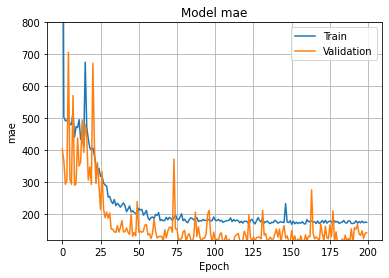

In [134]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'] )
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()